## Libraries

In [7]:
import pandas as pd
import numpy as np

# Cleaning libs
from bs4 import BeautifulSoup
import re
import nltk

# Set up Lemmatizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

# Load english stop words
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Load stop words
stop_words =  set(stopwords.words("english"))

# Other cleaning libs
from bs4 import BeautifulSoup
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words

# Set up different stemmers
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

# build vocab
from collections import Counter
from itertools import chain

import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# model
from attention import AttentionLayer
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
from matplotlib import pyplot

[nltk_data] Downloading package stopwords to /home/fabian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fabian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Using TensorFlow backend.


In [8]:
INSTALL_MSG = """
Bart will be released through pip in v 3.0.0, until then use it by installing from source:
git clone git@github.com:huggingface/transformers.git
git checkout d6de6423
cd transformers
pip install -e ".[dev]"
"""

import torch
try:
    import transformers
    from transformers import BartTokenizer, BartForConditionalGeneration
except ImportError:
    raise ImportError(INSTALL_MSG)
from IPython.display import display, Markdown

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

LONG_BORING_TENNIS_ARTICLE = """
 Andy Murray  came close to giving himself some extra preparation time for his w
edding next week before ensuring that he still has unfinished tennis business to
 attend to. The world No 4 is into the semi-finals of the Miami Open, but not be
.... <more text here>
""".replace('\n','')

tokenizer = BartTokenizer.from_pretrained('bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('bart-large-cnn')

# article_input_ids = tokenizer.batch_encode_plus([LONG_BORING_TENNIS_ARTICLE], return_tensors='pt', max_length=1024)['input_ids'].to(torch_device)
# summary_ids = model.generate(article_input_ids,
#                              num_beams=4,
#                              length_penalty=2.0,
#                              max_length=142,
#                              #min_len=56,
#                              no_repeat_ngram_size=3)

# summary_txt = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
# display(Markdown('> **Summary: **'+summary_txt))

In [9]:
art = pd.read_csv("articles.csv", sep =",")
art.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next-big-thing-what-happened-5fc49dd6fa61?source=---------0----------------,Chatbots were the next big thing: what happened? – The Startup – Medium,"Oh, how the headlines blared:\nChatbots were The Next Big Thing.\nOur hopes were sky high. Bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start soc..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data-science-8-concepts-you-may-have-forgotten-i-did-825966908393?source=---------1----------------,Python for Data Science: 8 Concepts You May Have Forgotten,"If you’ve ever found yourself looking up the same question, concept, or syntax over and over again when programming, you’re not alone.\nI find myself doing this constantly.\nWhile it’s not unnatur..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219?source=---------2----------------,Automated Feature Engineering in Python – Towards Data Science,"Machine learning is increasingly moving from hand-designed models to automatically optimized pipelines using tools such as H20, TPOT, and auto-sklearn. These libraries, along with methods such as ..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learning-how-to-go-from-zero-to-hero-40e26f8aa6da?source=---------3----------------,Machine Learning: how to go from Zero to Hero – freeCodeCamp,"If your understanding of A.I. and Machine Learning is a big question mark, then this is the blog post for you. Here, I gradually increase your AwesomenessicityTM by gluing inspirational videos tog..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcement-learning-from-scratch-819b65f074d8?source=---------4----------------,Reinforcement Learning from scratch – Insight Data,"Want to learn about applied Artificial Intelligence from leading practitioners in Silicon Valley, New York, or Toronto? Learn more about the Insight Artificial Intelligence Fellows Program.\nAre y..."


In [10]:
art.shape

(337, 6)

In [19]:
article_input_ids = tokenizer.batch_encode_plus([art['text'][0]], return_tensors='pt', max_length=1024)['input_ids'].to(torch_device)
summary_ids = model.generate(article_input_ids,
                             num_beams=4,
                             length_penalty=2.0,
                             max_length=142,
                             #min_len=56,
                             no_repeat_ngram_size=3)

summary_txt = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
#display(Markdown('> **Summary: **'+summary_txt))
print('Summary: ' + summary_txt)

Summary: Chatbots were the main headliners at the Mobile World Congress 2017. The only question around chatbots was who would monopolize the field, not whether chatbots would take off in the first place. There isn’t even an ecosystem for a platform to dominate. The big divide is text vs. speech.


## Data Cleaning

In [60]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [61]:
def clean_sentences(df, bStemming = False):

    sentences = []

    for sent in df:
        sent = str(sent).replace('\n', ' ')
        
        sent = sent.lower()
        
        #remove html content
        text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", text)

        # remove contractions
        review_text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    
        #tokenize the sentences
        words = word_tokenize(text.lower())
  
        #lemmatize each word to its lemma
        #lemma_words = [lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in words]
      
        sent_removed_sw = [word for word in words if word not in stop_words]
        
        if bStemming == True:
          stemmed_words = [porter.stem(i) for i in sent_removed_sw]
        else:
          stemmed_words = words
          
        cleaned_str = TreebankWordDetokenizer().detokenize(stemmed_words)  
        
        sentences.append(cleaned_str)

    return(sentences)

In [62]:
art['clean_title'] = clean_sentences(art['title'])
art['clean_title'] = art['clean_title'].apply(lambda x : 'sostok '+ x + ' eostok')
art['clean_text'] = clean_sentences(art['text'])
art.head()

,author,claps,reading_time,link,title,text,clean_title,clean_text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next-big-thing-what-happened-5fc49dd6fa61?source=---------0----------------,Chatbots were the next big thing: what happened? – The Startup – Medium,"Oh, how the headlines blared:\nChatbots were The Next Big Thing.\nOur hopes were sky high. Bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start soc...",sostok chatbots were the next big thing: what happened? – the startup – medium eostok,"oh, how the headlines blared: chatbots were the next big thing . our hopes were sky high . bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start soc..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data-science-8-concepts-you-may-have-forgotten-i-did-825966908393?source=---------1----------------,Python for Data Science: 8 Concepts You May Have Forgotten,"If you’ve ever found yourself looking up the same question, concept, or syntax over and over again when programming, you’re not alone.\nI find myself doing this constantly.\nWhile it’s not unnatur...",sostok python for data science : 8 concepts you may have forgotten eostok,"if you ’ ve ever found yourself looking up the same question, concept, or syntax over and over again when programming, you ’ re not alone . i find myself doing this constantly . while it ’ s not u..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219?source=---------2----------------,Automated Feature Engineering in Python – Towards Data Science,"Machine learning is increasingly moving from hand-designed models to automatically optimized pipelines using tools such as H20, TPOT, and auto-sklearn. These libraries, along with methods such as ...",sostok automated feature engineering in python – towards data science eostok,"machine learning is increasingly moving from hand-designed models to automatically optimized pipelines using tools such as h20, tpot, and auto-sklearn . these libraries, along with methods such as..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learning-how-to-go-from-zero-to-hero-40e26f8aa6da?source=---------3----------------,Machine Learning: how to go from Zero to Hero – freeCodeCamp,"If your understanding of A.I. and Machine Learning is a big question mark, then this is the blog post for you. Here, I gradually increase your AwesomenessicityTM by gluing inspirational videos tog...",sostok machine learning: how to go from zero to hero – freecodecamp eostok,"if your understanding of a.i . and machine learning is a big question mark, then this is the blog post for you . here, i gradually increase your awesomenessicitytm by gluing inspirational videos t..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcement-learning-from-scratch-819b65f074d8?source=---------4----------------,Reinforcement Learning from scratch – Insight Data,"Want to learn about applied Artificial Intelligence from leading practitioners in Silicon Valley, New York, or Toronto? Learn more about the Insight Artificial Intelligence Fellows Program.\nAre y...",sostok reinforcement learning from scratch – insight data eostok,"want to learn about applied artificial intelligence from leading practitioners in silicon valley, new york, or toronto? learn more about the insight artificial intelligence fellows program . are y..."


In [63]:
subset = art[['clean_title', 'clean_text',]]
tuples = [tuple(x) for x in subset.to_numpy()]

## Build Vocabulary

In [64]:
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return vocab, vocabcount

In [65]:
heads = art['clean_title']
desc = art['clean_text']

In [66]:
vocab, vocabcount = get_vocab(heads+desc)
print('Length of vocabulary: {}'.format(len(vocabcount)))

Length of vocabulary: 31965


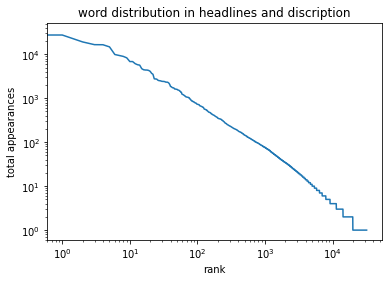

In [67]:
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

## Distribution

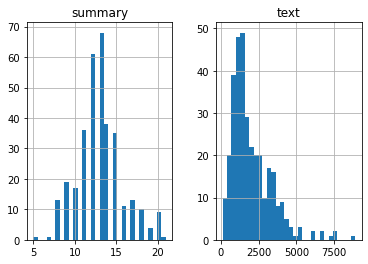

In [68]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in art['clean_text']:
      text_word_count.append(len(i.split()))

for i in art['clean_title']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

## Tokenize

In [69]:
max_len_text = 100
max_len_summary = 22

In [70]:
# split into train and test
x_tr, x_val, y_tr, y_val = train_test_split(art['clean_text'],art['clean_title'], test_size=0.1, random_state=0, shuffle=True)

In [71]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) + 1

In [72]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) + 1